<h1>Алгоритмы уменьшения размерности</h1>

In [1]:
#повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold 
#Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)
#необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами
#1. Google news word vectors dataset - https://code.google.com/archive/p/word2vec/
#(./distance GoogleNews-vectors-negative300.bin:)

#2. Coil20 - https://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php

#3. MNIST - http://yann.lecun.com/exdb/mnist/

In [7]:
#! pip install umap-learn gensim dataget
import pandas as pd
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from gensim.downloader import load
from scipy import io
from umap import UMAP
import dataget
import matplotlib.pyplot as plt
import time

In [8]:
#Загрузка данных
google_news = load('word2vec-google-news-300').vectors
google_news = google_news[:100000]

mnist = fetch_openml("mnist_784", version=1)

mat = io.loadmat('./COIL20.mat')
coil20 = mat['X']

_, _, f_mnist_x, f_mnist_y = dataget.image.fashion_mnist().get()
f_mnist = f_mnist_x.reshape(-1, 28*28)

datasets = [['COIL20', coil20, mat['Y']], ['MNIST', mnist.data, mnist.target.astype(int)], ['Fashion MNIST', f_mnist, f_mnist_y], ['Word Vectors', google_news, None]]

In [9]:
#Алгоритмы
umap = UMAP(random_state = 42)
tsne = TSNE(n_jobs = -1, random_state = 42)
pca = PCA(n_components = 2)

algorithms = [['UMAP', umap], ['t-SNE', tsne], ['PCA', pca]]

.................................
Algorithm:  UMAP
.................................
Dataset:  COIL20
Time:  4.98441219329834  sec
Dataset:  MNIST
Time:  72.72989821434021  sec
Dataset:  Fashion MNIST
Time:  22.373950481414795  sec
Dataset:  Word Vectors
Time:  118.17765164375305  sec
.................................
Algorithm:  t-SNE
.................................
Dataset:  COIL20
Time:  9.386807203292847  sec
Dataset:  MNIST
Time:  1044.4688136577606  sec
Dataset:  Fashion MNIST
Time:  84.3502402305603  sec
Dataset:  Word Vectors
Time:  1849.7275650501251  sec
.................................
Algorithm:  PCA
.................................
Dataset:  COIL20
Time:  0.9349427223205566  sec
Dataset:  MNIST
Time:  1.999640703201294  sec
Dataset:  Fashion MNIST
Time:  0.26591944694519043  sec
Dataset:  Word Vectors
Time:  0.9381427764892578  sec


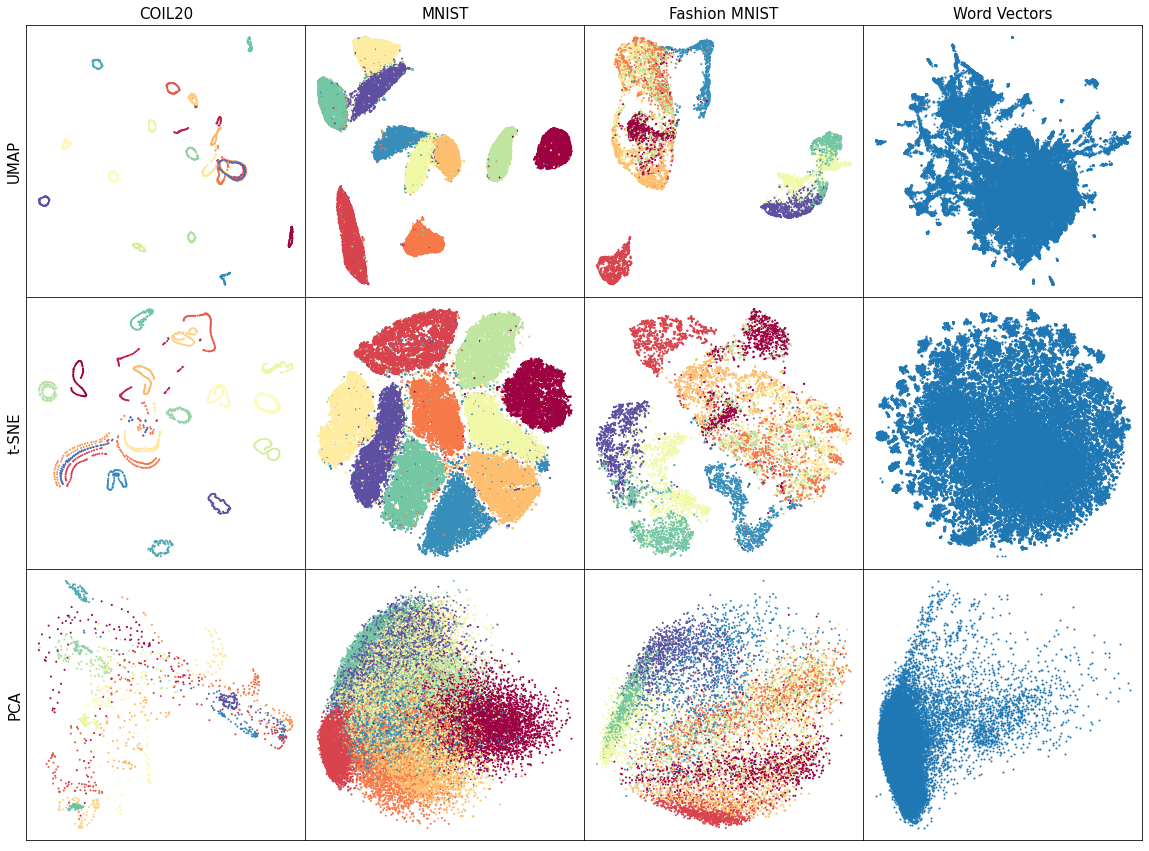

In [12]:
len_a = len(algorithms)
len_d = len(datasets)
fig, ax = plt.subplots(len_a, len_d, figsize=(20, 15))
for i in range(len_a):
    ax[i, 0].set_ylabel(algorithms[i][0], fontsize = 15)
    algorithm = algorithms[i][1]
    print('.................................')
    print('Algorithm: ', algorithms[i][0])
    print('.................................')
    for j in range(len_d):
        ax[0, j].set_title(datasets[j][0], fontsize = 15)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        dataset = datasets[j][1]
        time_start = time.time()
        embedding = algorithm.fit_transform(dataset)
        time_end = time.time()
        ax[i, j].scatter(embedding[:, 0], embedding[:, 1], s = 1, c = datasets[j][2], cmap = 'Spectral')
        time_work = time_end - time_start
        print('Dataset: ', datasets[j][0])
        print('Time: ', time_work, ' sec')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()